<a href="https://colab.research.google.com/github/eriiin/DataAnalysis_StrokePrediction/blob/main/NEW_Data_Features_Manipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
import plotly.express as px
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import statsmodels.formula.api as smf

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
df = pd.read_csv("WashedData.csv")
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,4,1,228.69,36.600000,1,1
1,0,61,0,0,1,3,0,202.21,28.893237,0,1
2,1,80,0,1,1,4,0,105.92,32.500000,0,1
3,0,49,0,0,1,4,1,171.23,34.400000,2,1
4,0,79,1,0,1,3,0,174.12,24.000000,0,1


In [4]:
for col in df:
    if df[col].isnull().values.any():
        print(col)

In [5]:
df.isnull().any()

gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

In [6]:
df.corr()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,0.043098,0.034735,0.100942,0.023835,-0.015880,-0.014612,0.066174,0.012782,0.077347,0.015634
age,0.043098,1.000000,0.269664,0.264300,0.523428,0.022598,0.018400,0.232698,0.075868,0.047766,0.250794
hypertension,0.034735,0.269664,1.000000,0.105633,0.117222,-0.007090,-0.008270,0.164568,0.123809,-0.000050,0.134717
heart_disease,0.100942,0.264300,0.105633,1.000000,0.079790,0.012988,0.016091,0.148222,-0.001694,0.058759,0.129346
ever_married,0.023835,0.523428,0.117222,0.079790,1.000000,0.070219,0.012400,0.122544,0.152010,0.069894,0.078076
work_type,-0.015880,0.022598,-0.007090,0.012988,0.070219,1.000000,-0.021114,-0.011493,0.072205,0.056739,0.012451
Residence_type,-0.014612,0.018400,-0.008270,0.016091,0.012400,-0.021114,1.000000,-0.009749,-0.008038,0.038841,0.007872
avg_glucose_level,0.066174,0.232698,0.164568,0.148222,0.122544,-0.011493,-0.009749,1.000000,0.148760,0.013859,0.128714
bmi,0.012782,0.075868,0.123809,-0.001694,0.152010,0.072205,-0.008038,0.148760,1.000000,0.032854,0.007704
smoking_status,0.077347,0.047766,-0.000050,0.058759,0.069894,0.056739,0.038841,0.013859,0.032854,1.000000,0.021686


# data clean func

In [10]:
# function for processing the df to give it new features
# copy the function to run it on cleaned df

def process(df):
    # This is where you can do all your processing

    df['age_bmi'] = df['age']*df['bmi']
    df['age_hypertension'] = df['age']*df['hypertension']
    df['age_heart_disease'] = df['age']*df['heart_disease']
    df['age_avg_glucose_level'] = df['age']*df['avg_glucose_level']
    df['work_type_Residence_type'] = df['work_type']*df['Residence_type']
    df['ever_married_smoking_status'] = df['ever_married']*df['smoking_status']
    df['ever_married_heart_disease'] = df['ever_married']*df['heart_disease']
    
    df['bmi_heart_disease'] = df['bmi']*df['heart_disease']
    
    scaler = StandardScaler()
    df[['age_bmi', 'age_hypertension', 'age_heart_disease', 
    'age_avg_glucose_level', 'work_type_Residence_type', 
    'ever_married_smoking_status', 'ever_married_heart_disease',
   'bmi_heart_disease']] = scaler.fit_transform(df[['age_bmi', 'age_hypertension', 'age_heart_disease', 
                                                    'age_avg_glucose_level', 'work_type_Residence_type', 
                                                    'ever_married_smoking_status', 'ever_married_heart_disease',
                                                   'bmi_heart_disease']])

    return df

In [11]:
process(df)
df.corr()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_bmi,age_hypertension,age_heart_disease,age_avg_glucose_level,work_type_Residence_type,ever_married_smoking_status,ever_married_heart_disease,bmi_heart_disease
gender,1.000000,0.043098,0.034735,0.100942,0.023835,-0.015880,-0.014612,0.066174,0.012782,0.077347,0.015634,0.045538,0.027988,0.096603,0.066671,-0.013538,0.087754,0.103766,0.099799
age,0.043098,1.000000,0.269664,0.264300,0.523428,0.022598,0.018400,0.232698,0.075868,0.047766,0.250794,0.855181,0.322145,0.284985,0.680122,0.026492,0.195516,0.252210,0.253155
hypertension,0.034735,0.269664,1.000000,0.105633,0.117222,-0.007090,-0.008270,0.164568,0.123809,-0.000050,0.134717,0.290169,0.973021,0.111309,0.265024,-0.007822,0.033242,0.090043,0.110186
heart_disease,0.100942,0.264300,0.105633,1.000000,0.079790,0.012988,0.016091,0.148222,-0.001694,0.058759,0.129346,0.216837,0.128402,0.986296,0.256661,0.016946,0.077338,0.940070,0.984656
ever_married,0.023835,0.523428,0.117222,0.079790,1.000000,0.070219,0.012400,0.122544,0.152010,0.069894,0.078076,0.489677,0.120973,0.080974,0.342307,0.032162,0.401850,0.138082,0.079689
work_type,-0.015880,0.022598,-0.007090,0.012988,0.070219,1.000000,-0.021114,-0.011493,0.072205,0.056739,0.012451,0.031858,-0.008795,0.012802,0.004546,0.237288,0.044560,0.013200,0.014378
Residence_type,-0.014612,0.018400,-0.008270,0.016091,0.012400,-0.021114,1.000000,-0.009749,-0.008038,0.038841,0.007872,0.010562,-0.008621,0.012494,0.007642,0.934769,0.037968,0.016306,0.019186
avg_glucose_level,0.066174,0.232698,0.164568,0.148222,0.122544,-0.011493,-0.009749,1.000000,0.148760,0.013859,0.128714,0.290426,0.177094,0.150827,0.841504,-0.008639,0.052246,0.142899,0.153425
bmi,0.012782,0.075868,0.123809,-0.001694,0.152010,0.072205,-0.008038,0.148760,1.000000,0.032854,0.007704,0.547493,0.090867,-0.009994,0.143747,0.010134,0.060898,0.000578,0.030254
smoking_status,0.077347,0.047766,-0.000050,0.058759,0.069894,0.056739,0.038841,0.013859,0.032854,1.000000,0.021686,0.050001,-0.009897,0.053582,0.029420,0.047742,0.823019,0.054969,0.056302


In [12]:
model_all = smf.ols(formula='stroke ~ age + hypertension + heart_disease + ever_married + work_type + Residence_type + avg_glucose_level + bmi + smoking_status', data=df).fit()
model_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 stroke   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     33.95
Date:                Sat, 07 May 2022   Prob (F-statistic):           6.53e-58
Time:                        02:09:07   Log-Likelihood:                 309.88
No. Observations:                3566   AIC:                            -599.8
Df Residuals:                    3556   BIC:                            -538.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0982      0.024     -4.164      0.000      -0.144      -0.052
age                   0.0029      0.000     11.746      0.000       0.002       0.003
hypertension          0.0447      0.012      3.784      0.000       0.022       0.068
heart_disease         0.0511      0.016      3.211      0.001       0.020       0.082
ever_married         -0.0355      0.010     -3.422      0.001      -0.056      -0.015
work_type             0.0034      0.004      0.806      0.421      -0.005       0.012
Residence_type        0.0020      0.007      0.267      0.790      -0.013       0.017
avg_glucose_level     0.0003   8.07e-05      3.887      0.000       0.000       0.000
bmi                  -0.0006      0.001     -1.164      0.244      -0.002       0.000
smoking_status        0.0030      0.005      0.649      0.517      -0.006       0.012
==============================================================================
Omnibus:                     2459.395   Durbin-Watson:                   0.164
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23878.785
Skew:                           3.369   Prob(JB):                         0.00
Kurtosis:                      13.738   Cond. No.                         844.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
model_newf = smf.ols(formula='stroke ~ age_bmi + age_hypertension + age_heart_disease + age_avg_glucose_level + work_type_Residence_type + ever_married_smoking_status + ever_married_heart_disease + bmi_heart_disease', data=df).fit()
model_newf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 stroke   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     35.04
Date:                Sat, 07 May 2022   Prob (F-statistic):           9.61e-54
Time:                        02:11:41   Log-Likelihood:                 298.16
No. Observations:                3566   AIC:                            -578.3
Df Residuals:                    3557   BIC:                            -522.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       0.0566      0.004     15.180      0.000       0.049       0.064
age_bmi                         0.0177      0.005      3.515      0.000       0.008       0.028
age_hypertension                0.0187      0.004      4.690      0.000       0.011       0.027
age_heart_disease               0.0334      0.015      2.212      0.027       0.004       0.063
age_avg_glucose_level           0.0315      0.005      6.279      0.000       0.022       0.041
work_type_Residence_type        0.0020      0.004      0.547      0.585      -0.005       0.009
ever_married_smoking_status     0.0039      0.004      1.008      0.314      -0.004       0.011
ever_married_heart_disease     -0.0175      0.011     -1.608      0.108      -0.039       0.004
bmi_heart_disease              -0.0004      0.015     -0.027      0.979      -0.029       0.028
==============================================================================
Omnibus:                     2498.601   Durbin-Watson:                   0.152
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25332.330
Skew:                           3.424   Prob(JB):                         0.00
Kurtosis:                      14.118   Cond. No.                         9.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
def smf_models(df, feature_name):
    model = smf.ols(formula='stroke ~ ' + feature_name + ' + I(' + feature_name + '**2) + I(' + feature_name + '**3)', data=df).fit()
    
    # uncomment below to get summary as output too
    # model.summary()
    
    # print r squared values
    print('R squared for ' + feature_name + '^3: ', model.rsquared, "\n",)

    # Add subplots with sns
    sns.kdeplot(df.loc[df['stroke'] == 1][feature_name], label='Stroke', shade=True)
    sns.kdeplot(df.loc[df['stroke'] == 0][feature_name], label='No Stroke', shade=True)
    sns.kdeplot().set(title=feature_name + '^3')

R squared for age_bmi^3:  0.04972208603595907 



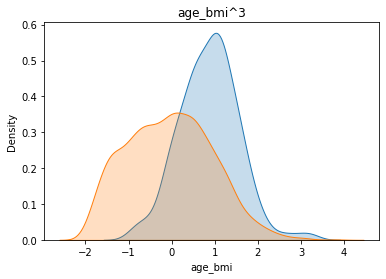

In [15]:
smf_models(df, 'age_bmi')

R squared for ever_married_heart_disease^3:  0.007059109681146536 



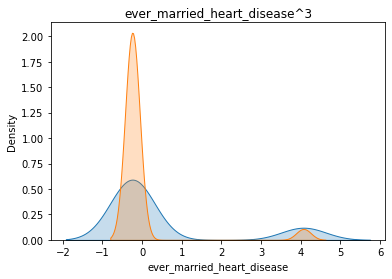

In [16]:
smf_models(df, 'ever_married_heart_disease')

In [18]:
df_washed = pd.read_csv("WashedData.csv")
df_washed.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,4,1,228.69,36.600000,1,1
1,0,61,0,0,1,3,0,202.21,28.893237,0,1
2,1,80,0,1,1,4,0,105.92,32.500000,0,1
3,0,49,0,0,1,4,1,171.23,34.400000,2,1
4,0,79,1,0,1,3,0,174.12,24.000000,0,1


In [19]:
df_washed_newf = process(df)

In [21]:
df_washed_newf.to_csv("washed_newfeatures.csv")